In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
os.chdir('C:/Users/Aadhi/ML Data sets/archive (1)')
from sklearn.model_selection import train_test_split

In [3]:
data=[]
labels=[]
classes = 43
cur_path = os.getcwd()

In [4]:
cur_path

'C:\\Users\\Aadhi\\ML Data sets\\archive (1)'

In [5]:
from PIL import Image
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    
    for x in images:
        try:
            image = Image.open(path + '\\' + x)
            image = image.resize((30,30))
            image = np.asarray(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [6]:
data = np.array(data)
labels = np.array(labels)

In [7]:
data.shape

(39209, 30, 30, 3)

In [8]:
labels.shape

(39209,)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

In [10]:
from keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [12]:
cnn = tf.keras.models.Sequential()

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', input_shape = x_train.shape[1:]))

In [14]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [16]:
cnn.add(tf.keras.layers.Flatten())

In [17]:
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))

In [18]:
cnn.add(tf.keras.layers.Dense(units = 43, activation = 'softmax'))

In [19]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
temp = cnn.fit(x_train, y_train, epochs = 25, validation_data = (x_test, y_test))

Epoch 1/25
981/981 [==============================] - 129s 126ms/step - loss: 4.0733 - accuracy: 0.4076 - val_loss: 0.4444 - val_accuracy: 0.8823
Epoch 2/25
981/981 [==============================] - 152s 155ms/step - loss: 0.4081 - accuracy: 0.8961 - val_loss: 0.3788 - val_accuracy: 0.9148
Epoch 3/25
981/981 [==============================] - 137s 139ms/step - loss: 0.2213 - accuracy: 0.9420 - val_loss: 0.3437 - val_accuracy: 0.9206
Epoch 4/25
981/981 [==============================] - 136s 138ms/step - loss: 0.1847 - accuracy: 0.9527 - val_loss: 0.3621 - val_accuracy: 0.9300
Epoch 5/25
981/981 [==============================] - 123s 126ms/step - loss: 0.1630 - accuracy: 0.9620 - val_loss: 0.2998 - val_accuracy: 0.9431
Epoch 6/25
981/981 [==============================] - 98s 100ms/step - loss: 0.1550 - accuracy: 0.9623 - val_loss: 0.2375 - val_accuracy: 0.9550
Epoch 7/25
981/981 [==============================] - 114s 116ms/step - loss: 0.1209 - accuracy: 0.9716 - val_loss: 0.2993 - 

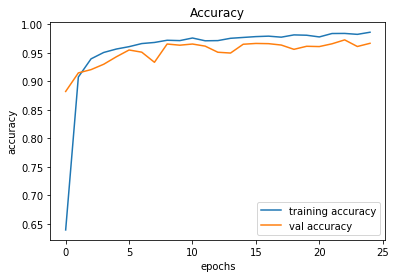

In [24]:

# accuracy 
plt.figure(0)
plt.plot(temp.history['accuracy'], label='training accuracy')
plt.plot(temp.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

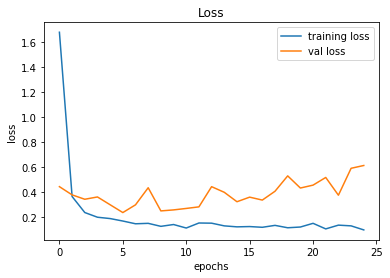

In [25]:

# Loss
plt.plot(temp.history['loss'], label='training loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.asarray(image))
    x_test=np.array(data)
    return x_test,label

In [28]:
x_test, label = testing('Test.csv')

In [31]:
y_pred = np.argmax(cnn.predict(x_test), axis=-1)
y_pred

array([16,  1, 38, ..., 42,  7, 10], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(label, y_pred)

0.9014251781472684

In [34]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [35]:
def testing_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.asarray(image))
    x_test = np.asarray(data)
    y_pred = np.argmax(cnn.predict(x_test), axis=-1)
    return image,y_pred

The predicted traffic sign is Speed limit (30km/h)


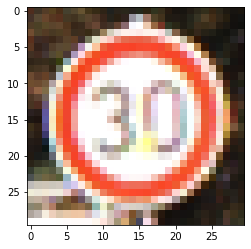

In [36]:
plot, prediction = testing_img(r'C:\Users\Aadhi\ML Data sets\archive (1)\Test\00024.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("The predicted traffic sign is " + classes[a])
plt.imshow(plot)
plt.show()

The predicted traffic sign is Dangerous curve right


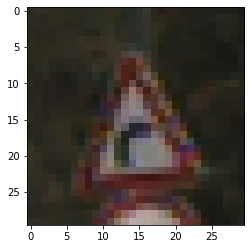

In [37]:
plot, prediction = testing_img(r'C:\Users\Aadhi\ML Data sets\archive (1)\Test\00017.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("The predicted traffic sign is " + classes[a])
plt.imshow(plot)
plt.show()